### Forest Cover Type Classification

This notebook demonstrates a complete machine learning workflow for forest cover type classification. It includes data preprocessing, feature selection, model optimization, and evaluation using various classifiers.

#### Step 1: Import Libraries
Import pandas and numpy for data manipulation.

In [3]:
import pandas as pd
import numpy as np

#### Step 2: Load the Dataset
Read the training data from 'train.csv' into a pandas DataFrame.

In [4]:
df = pd.read_csv('train.csv')

#### Step 3: Preview the Data
Display the first few rows to understand the structure and contents of the dataset.

In [5]:
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


#### Step 4: Check for Missing Values
Verify if there are any missing values in the dataset.

In [6]:
df.isnull().sum().any()

np.False_

#### Step 5: Check for Duplicates
Check if there are any duplicate rows in the dataset.

In [7]:
df.duplicated().sum().any()

np.False_

#### Step 6: DataFrame Info
Display information about the DataFrame, including column types and non-null counts.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

#### Step 7: Target Distribution
Show the distribution of the target variable `Cover_Type`.

In [9]:
df['Cover_Type'].value_counts()

Cover_Type
5    2160
2    2160
1    2160
7    2160
3    2160
6    2160
4    2160
Name: count, dtype: int64

#### Step 8: Feature Scaling
Standardize numerical features using `StandardScaler` for better model performance.

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_features = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                      'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                      'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

df[numerical_features] = scaler.fit_transform(df[numerical_features])

#### Step 9: Data Description
Get summary statistics of the scaled features.

In [11]:
df.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,1.512000e+04,1.512000e+04,1.512000e+04,1.512000e+04,1.512000e+04,1.512000e+04,1.512000e+04,1.512000e+04,1.512000e+04,1.512000e+04,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,3.609106e-16,1.203035e-16,-2.048920e-16,4.511382e-17,-3.759485e-18,8.270868e-17,-3.637302e-16,4.812141e-16,6.015177e-17,9.022765e-17,0.237897,0.033003,0.419907,0.309193,0.023479,0.041204,0.063624,0.055754,0.010913,0.042989,0.0,0.000066,0.000661,0.141667,0.026852,0.015013,0.031481,0.011177,0.0,0.007540,0.040476,0.003968,0.003042,0.009193,0.001058,0.022817,0.050066,0.016997,0.000066,0.003571,0.000992,0.000595,0.085384,0.047950,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,0.425810,0.178649,0.493560,0.462176,0.151424,0.198768,0.244091,0.229454,0.103896,0.202840,0.0,0.008133,0.025710,0.348719,0.161656,0.121609,0.174621,0.105133,0.0,0.086506,0.197080,0.062871,0.055075,0.095442,0.032514,0.149326,0.218089,0.129265,0.008133,0.059657,0.031482,0.024391,0.279461,0.213667,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,-2.122093e+00,-1.423270e+00,-1.952008e+00,-1.081532e+00,-3.218239e+00,-1.293580e+00,-6.960156e+00,-5.261370e+00,-2.943587e+00,-1.373895e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,-8.938338e-01,-8.328021e-01,-7.690867e-01,-7.625885e-01,-7.524248e-01,-7.169865e-01,-5.466017e-01,-5.247795e-01,-6.339000e-01,-7.101984e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,6.410523e-03,-2.786705e-01,-1.776260e-01,-2.246683e-01,-3.115176e-01,-3.003898e-01,2.387315e-01,1.769376e-01,6.336391e-02,-2.319731e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000

#### Step 10: Feature Selection
Use `ExtraTreesClassifier` to determine feature importance and select the most relevant features.

In [12]:
X = df.drop(columns=['Id', 'Cover_Type'])
y = df['Cover_Type']

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_estimators=50)
clf.fit(X,y)

,n_estimators,50
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


#### Step 11: Select Important Features
Transform the feature set to keep only the most important features identified.

In [13]:
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)

e:\intern\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


#### Step 12: Get Selected Feature Names
List the names of the features selected by the model.

In [14]:
column_names = [X.columns[i] for i in range(len(X.columns)) if model.get_support()[i]]
column_names

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type3',
 'Soil_Type10',
 'Soil_Type38',
 'Soil_Type39']

#### Step 13: Create New DataFrame
Create a new DataFrame with only the selected features and the target variable.

In [15]:
df_new = pd.DataFrame(X_new,columns=column_names)
df_new['Cover_Type'] = y
df_new.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area3,Wilderness_Area4,Soil_Type3,Soil_Type10,Soil_Type38,Soil_Type39,Cover_Type
0,-0.367095,-0.959980,-1.597132,0.146639,-0.834074,-0.908681,0.271454,0.571653,0.281259,4.334805,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,-0.381461,-0.914559,-1.715424,-0.072337,-0.932054,-0.999246,0.238732,0.703225,0.346627,4.285710,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,0.130912,-0.160577,-0.887379,0.194243,0.227369,1.106379,0.696843,0.834797,-0.002005,4.191156,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.085421,-0.015231,0.177250,0.070474,1.092853,1.038455,0.827731,0.834797,-0.285268,4.272981,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,-0.369489,-1.014485,-1.715424,-0.353198,-0.850404,-0.998491,0.238732,0.659368,0.324838,4.237524,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5


#### Step 14: Visualize Target Distribution
Plot the distribution of the target variable in the new DataFrame.

<Axes: xlabel='Cover_Type'>

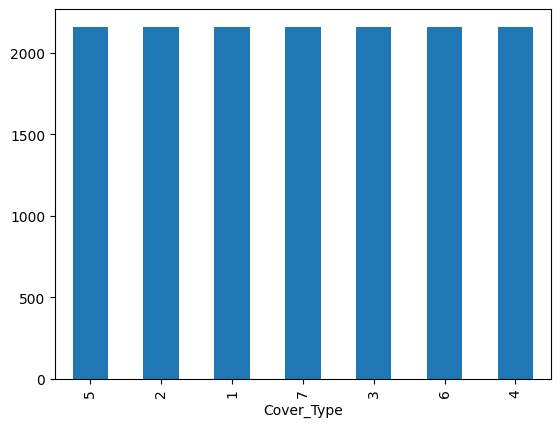

In [16]:
df_new['Cover_Type'].value_counts().plot(kind='bar')

#### Step 15: Correlation Heatmap
Visualize the correlation between features using a heatmap.

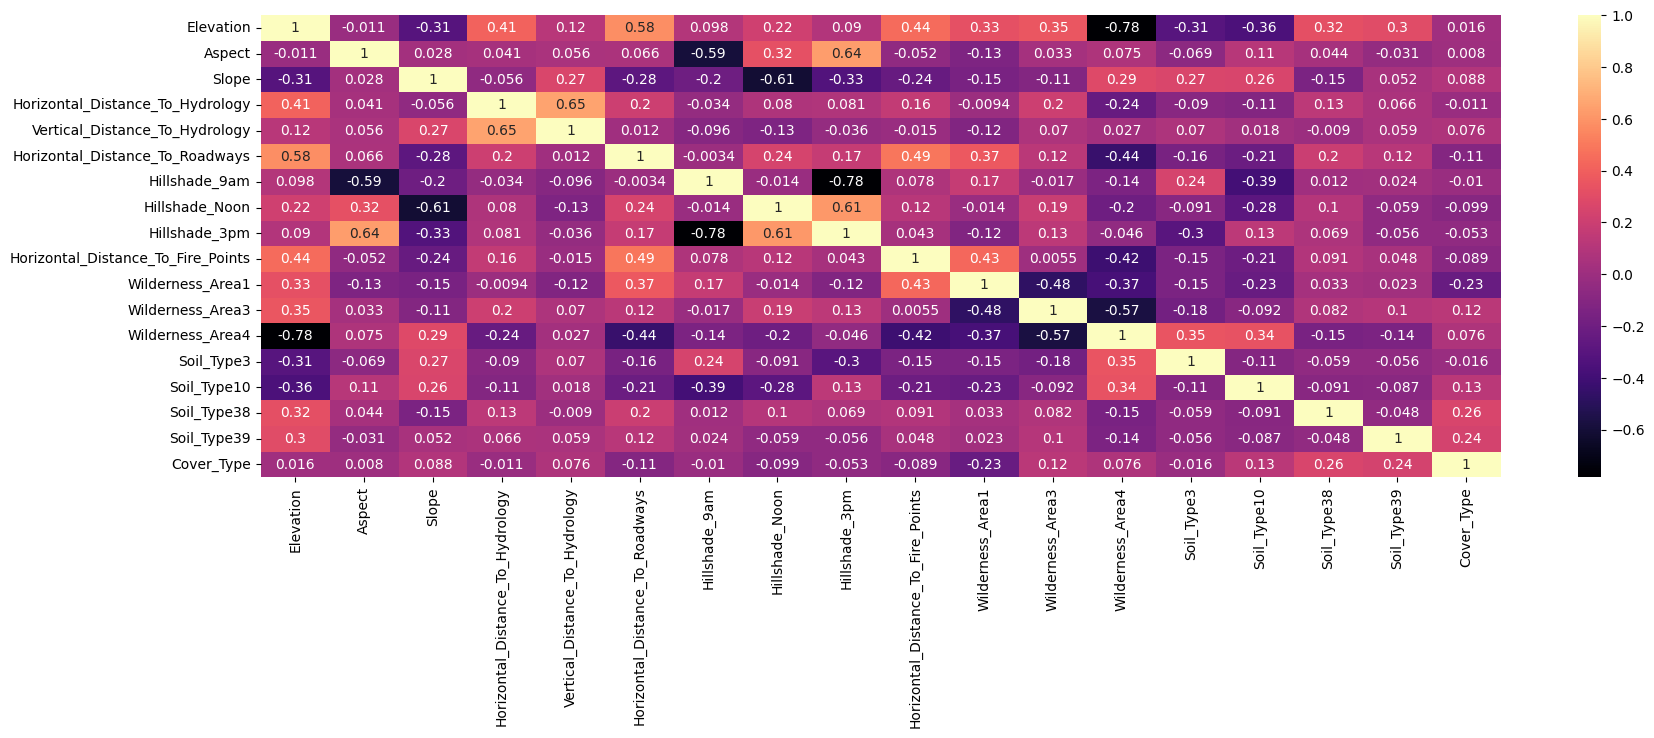

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,6))
sns.heatmap(df_new.corr(), annot=True, cmap='magma')
plt.show()

#### Step 16: Visualize Skewed Features
Plot the distribution of skewed features using KDE plots.

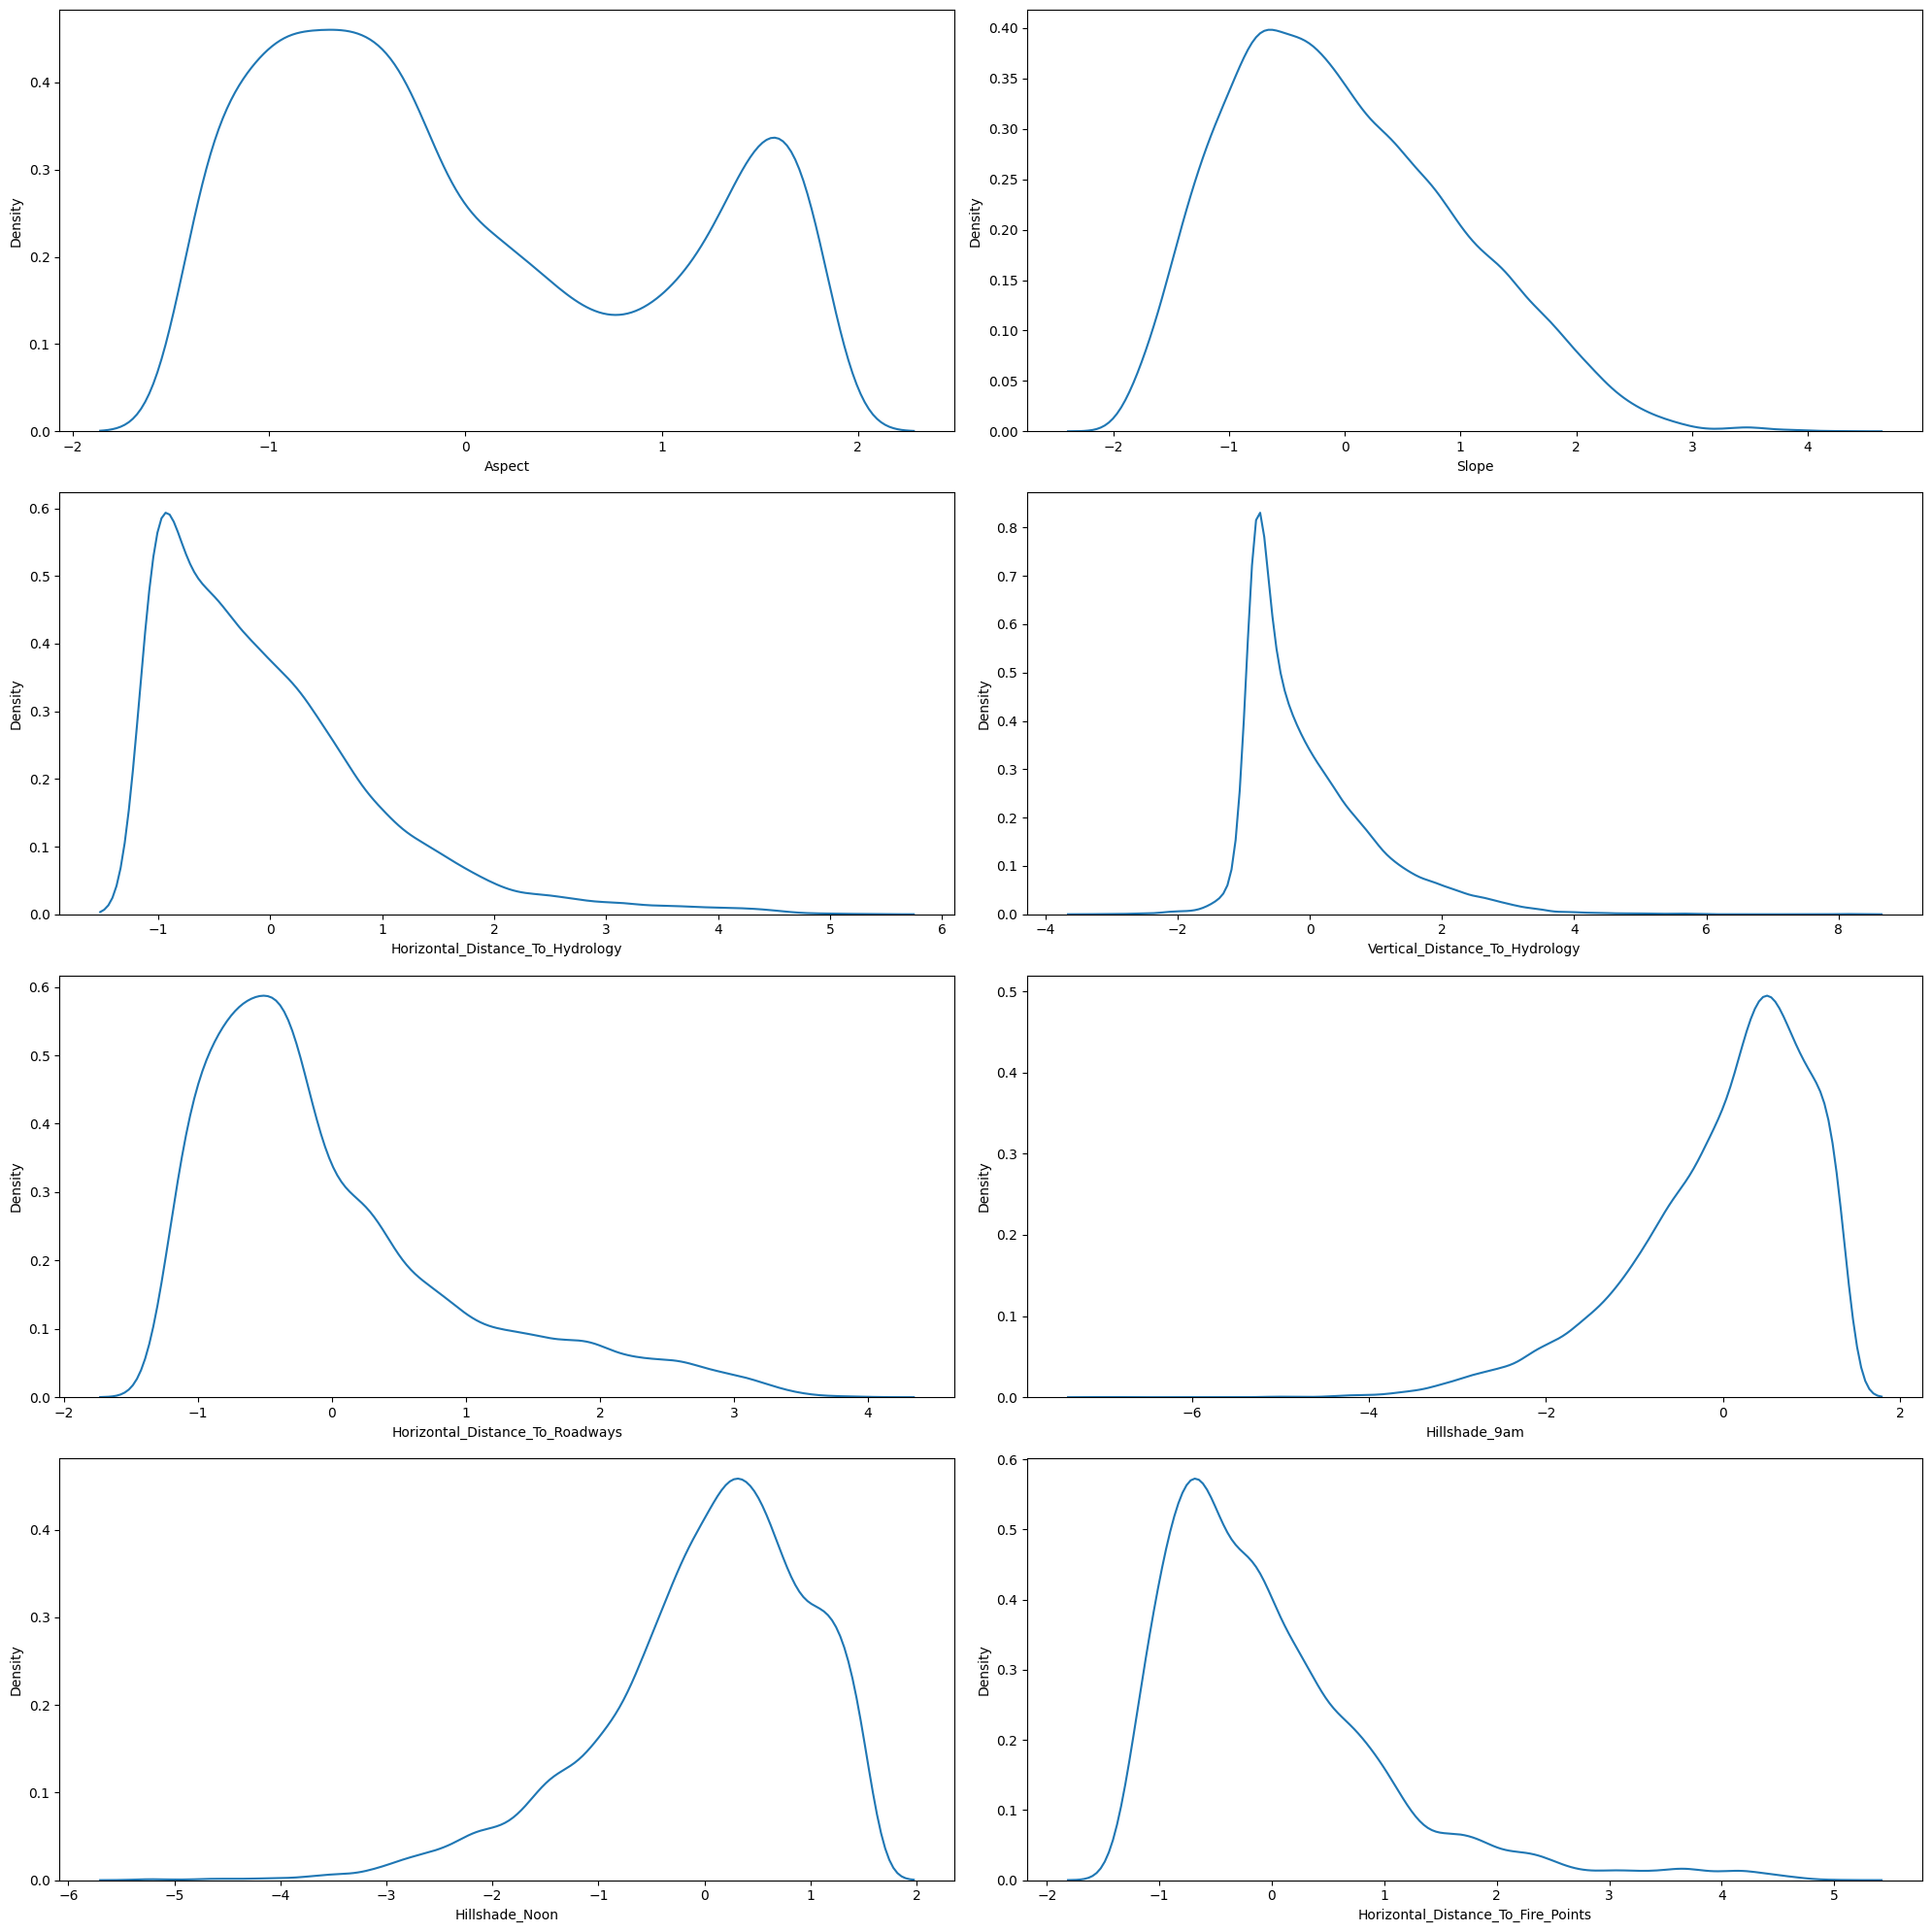

In [18]:
fig,axes = plt.subplots(4,2,figsize=(20,20))
axes = axes.flatten()

skewed_cols = ['Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
               'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Horizontal_Distance_To_Fire_Points']

for i, col in enumerate(skewed_cols):
    sns.kdeplot(data=df_new,x=col,ax=axes[i])

plt.tight_layout()
plt.show()


#### Step 17: Skewness Correction
Apply Yeo-Johnson transformation to correct skewness in selected features.

In [19]:
from scipy.stats import skew, yeojohnson

skew_threshold = 0.5

for col in skewed_cols:
    col_skew = skew(df_new[col].dropna())
    
    if abs(col_skew) > skew_threshold:
        df_new[col] = yeojohnson(df_new[col])[0]

print("Skewness correction applied.")


Skewness correction applied.


#### Step 18: Visualize Corrected Features
Plot the distributions of the features after skewness correction.

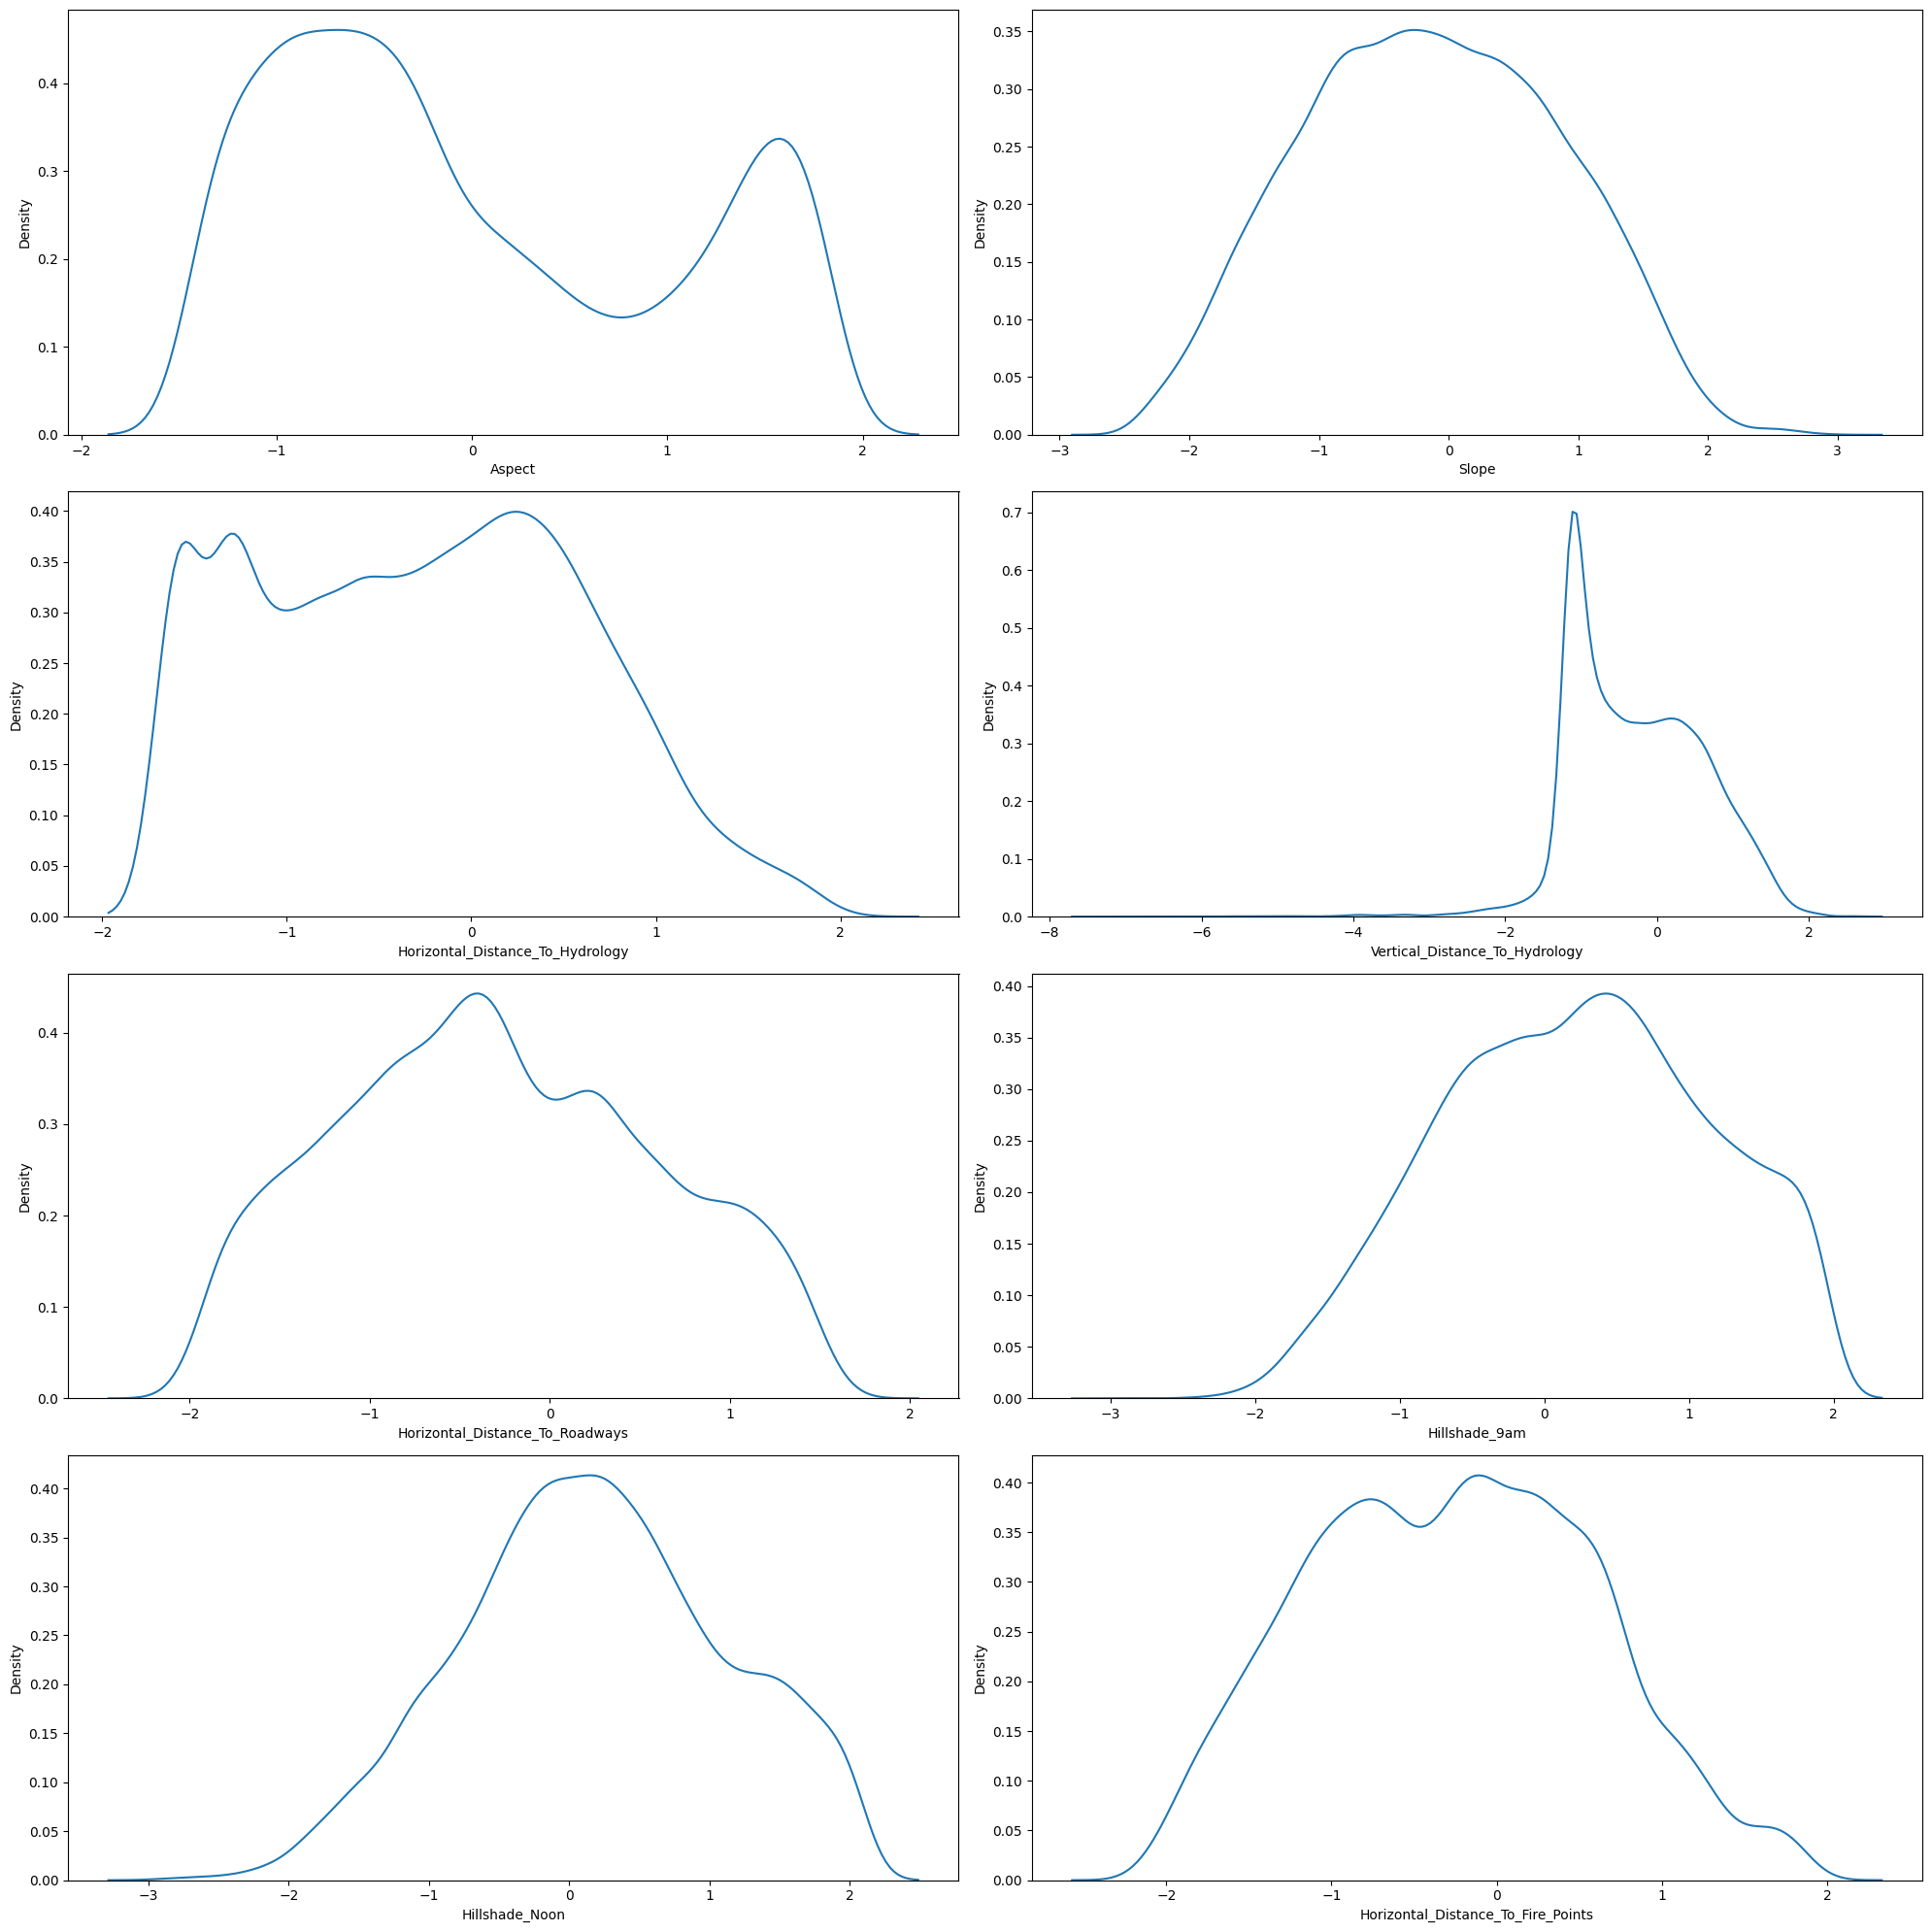

In [20]:
fig,axes = plt.subplots(4,2,figsize=(20,20))
axes = axes.flatten()

skewed_cols = ['Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
               'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Horizontal_Distance_To_Fire_Points']

for i, col in enumerate(skewed_cols):
    sns.kdeplot(data=df_new,x=col,ax=axes[i])

plt.tight_layout()
plt.show()

#### Step 19: Prepare Data for Modeling
Split the new DataFrame into features (X) and target (y) for modeling.

In [21]:
X = df_new.drop(columns=['Cover_Type'])
y = df_new['Cover_Type']

#### Step 20: Feature Statistics
Display summary statistics for the features to understand their distribution.

In [22]:
X.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area3,Wilderness_Area4,Soil_Type3,Soil_Type10,Soil_Type38,Soil_Type39
count,1.512000e+04,1.512000e+04,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,1.512000e+04,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,3.609106e-16,1.203035e-16,-0.127434,-0.271128,-0.261645,-0.292307,0.228377,0.179770,6.015177e-17,-0.267876,0.237897,0.419907,0.309193,0.063624,0.141667,0.048148,0.043452
std,1.000033e+00,1.000033e+00,0.977165,0.867753,0.863925,0.871941,0.915871,0.942315,1.000033e+00,0.855568,0.425810,0.493560,0.462176,0.244091,0.348719,0.214086,0.203880
min,-2.122093e+00,-1.423270e+00,-2.476672,-1.585975,-7.327846,-2.068720,-2.863248,-2.872313,-2.943587e+00,-2.195921,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.938338e-01,-8.328021e-01,-0.863232,-1.015413,-0.990711,-0.956864,-0.465415,-0.465269,-6.339000e-01,-0.933078,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.410523e-03,-2.786705e-01,-0.183170,-0.246964,-0.353004,-0.342759,0.258364,0.185220,6.336391e-02,-0.256057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.491925e-01,9.476862e-01,0.590020,0.407196,0.385293,0.353833,0.905958,0.825846,6.952593e-01,0.366771,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.632921e+00,1.847014e+00,2.913193,2.041784,2.585972,1.663495,1.932560,2.076803,2.460209e+00,1.956255,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Step 21: Train-Test Split
Split the data into training and testing sets using stratified sampling to preserve class distribution.

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

#### Step 22: Baseline Model
Train a `DummyClassifier` as a baseline and evaluate its performance using various metrics and a confusion matrix.

e:\intern\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\intern\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\intern\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\intern\.venv\Lib\site-packages\sklearn\metrics\_clas

Classification Report:
               precision    recall  f1-score   support

           1       0.14      1.00      0.25       648
           2       0.00      0.00      0.00       648
           3       0.00      0.00      0.00       648
           4       0.00      0.00      0.00       648
           5       0.00      0.00      0.00       648
           6       0.00      0.00      0.00       648
           7       0.00      0.00      0.00       648

    accuracy                           0.14      4536
   macro avg       0.02      0.14      0.04      4536
weighted avg       0.02      0.14      0.04      4536

Accuracy: 0.14285714285714285
Precision: 0.02040816326530612
Recall: 0.14285714285714285
F1 Score: 0.03571428571428571


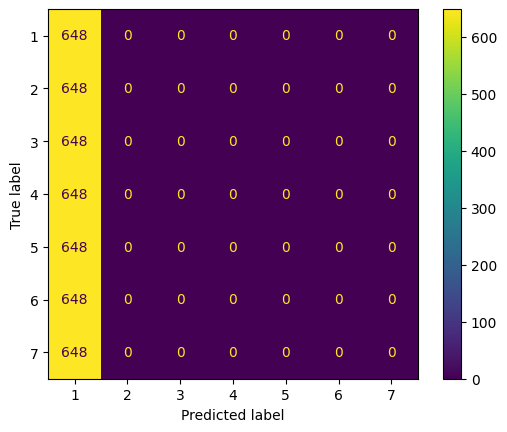

In [25]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score, ConfusionMatrixDisplay 

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

y_pred = dummy_clf.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

ConfusionMatrixDisplay.from_estimator(dummy_clf, X_test, y_test)
plt.show()

#### Step 23: Import Machine Learning Libraries
Import various classifiers and optimization libraries for model training and hyperparameter tuning.

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

import optuna

#### Step 24: Define Objective Function for Basic Classifiers
Create an objective function for Optuna to optimize hyperparameters for SVC, KNN, and Naive Bayes classifiers.

In [ ]:
def objective(trial):
    classifier_name = trial.suggest_categorical(
        "classifier", ["SVC", "KNN", "NaiveBayes"]
    )

    if classifier_name == "SVC":
        C = trial.suggest_float("svc_C", 1e-2, 1e2, log=True)
        kernel = trial.suggest_categorical("svc_kernel", ["linear", "poly", "rbf", "sigmoid"])
        clf = SVC(C=C, kernel=kernel, random_state=32)
    
    elif classifier_name == "KNN":
        n_neighbors = trial.suggest_int("knn_n_neighbors", 1, 30)
        weights = trial.suggest_categorical("knn_weights", ["uniform", "distance"])
        algorithm = trial.suggest_categorical("knn_algorithm", ["auto", "ball_tree", "kd_tree", "brute"])
        clf = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, algorithm=algorithm)

    elif classifier_name == "NaiveBayes":
        clf = GaussianNB()
    
    clf.fit(X_train, y_train)
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy",n_jobs=-1)

    return scores.mean()


#### Step 25: Define Objective Function for Tree-Based Classifiers
Create an objective function for Optuna to optimize hyperparameters for Decision Tree, Random Forest, Gradient Boosting, and XGBoost classifiers.

In [31]:
def objectiveTree(trial):
    classifier_name = trial.suggest_categorical(
        "classifier", ["DecisionTree", "RandomForest", "GradientBoosting", "XGBoost"]
    )
    
    if classifier_name == "DecisionTree":
        max_depth = trial.suggest_int("dt_max_depth", 2, 32, log=True)
        min_samples_split = trial.suggest_int("dt_min_samples_split", 2, 50)
        criterion = trial.suggest_categorical("dt_criterion", ["gini", "entropy"])
        clf = DecisionTreeClassifier(
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            criterion=criterion,
            random_state=32,
        )

    elif classifier_name == "RandomForest":
        n_estimators = trial.suggest_int("rf_n_estimators", 50, 300)
        max_depth = trial.suggest_int("rf_max_depth", 2, 32, log=True)
        min_samples_split = trial.suggest_int("rf_min_samples_split", 2, 14)
        clf = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            random_state=32,
        )
    
    elif classifier_name == "GradientBoosting":
        n_estimators = trial.suggest_int("gb_n_estimators", 50, 300)
        learning_rate = trial.suggest_float("gb_learning_rate", 0.01, 0.3, log=True)
        max_depth = trial.suggest_int("gb_max_depth", 2, 10)
        clf = GradientBoostingClassifier(
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            max_depth=max_depth,
            random_state=32,
        )
    
    elif classifier_name == "XGBoost":
        n_estimators = trial.suggest_int("xgb_n_estimators", 50, 300)
        learning_rate = trial.suggest_float("xgb_learning_rate", 0.01, 0.3, log=True)
        max_depth = trial.suggest_int("xgb_max_depth", 2, 10)
        subsample = trial.suggest_float("xgb_subsample", 0.5, 1.0)
        colsample_bytree = trial.suggest_float("xgb_colsample_bytree", 0.5, 1.0)

        clf = XGBClassifier(
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            max_depth=max_depth,
            subsample=subsample,
            colsample_bytree=colsample_bytree,
            random_state=32,
            use_label_encoder=False,
            eval_metric="mlogloss",
            
        )
    
    scores = cross_val_score(clf, X_train, y_train - 1, cv=5, scoring="accuracy",n_jobs=-1)
    return scores.mean()

#### Step 26: Optimize Basic Classifiers
Run Optuna optimization for basic classifiers (SVC, KNN, Naive Bayes) to find the best hyperparameters.

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50,show_progress_bar=True)


[I 2025-09-14 13:17:39,537] A new study created in memory with name: no-name-66699765-98b5-49cb-82a5-f20481bde7b8


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-09-14 13:17:39,698] Trial 0 finished with value: 0.4485067323396074 and parameters: {'classifier': 'NaiveBayes'}. Best is trial 0 with value: 0.4485067323396074.
[I 2025-09-14 13:17:39,782] Trial 1 finished with value: 0.4485067323396074 and parameters: {'classifier': 'NaiveBayes'}. Best is trial 0 with value: 0.4485067323396074.
[I 2025-09-14 13:17:40,909] Trial 2 finished with value: 0.721938390542668 and parameters: {'classifier': 'KNN', 'knn_n_neighbors': 16, 'knn_weights': 'uniform', 'knn_algorithm': 'kd_tree'}. Best is trial 2 with value: 0.721938390542668.
[I 2025-09-14 13:17:45,937] Trial 3 finished with value: 0.7631320581519841 and parameters: {'classifier': 'KNN', 'knn_n_neighbors': 8, 'knn_weights': 'distance', 'knn_algorithm': 'brute'}. Best is trial 3 with value: 0.7631320581519841.
[I 2025-09-14 13:17:46,368] Trial 4 finished with value: 0.7143801684625227 and parameters: {'classifier': 'KNN', 'knn_n_neighbors': 20, 'knn_weights': 'uniform', 'knn_algorithm': 'aut

#### Step 27: Optimize Tree-Based Classifiers
Run Optuna optimization for tree-based classifiers to find the best hyperparameters.

In [34]:
study_tree = optuna.create_study(direction="maximize")
study_tree.optimize(objectiveTree, n_trials=50,show_progress_bar=True)

[I 2025-09-14 13:55:15,604] A new study created in memory with name: no-name-89c94b65-5aa7-419b-86f8-4fd2c102f03f


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-09-14 13:55:23,566] Trial 0 finished with value: 0.6120574465596267 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 94, 'rf_max_depth': 2, 'rf_min_samples_split': 5}. Best is trial 0 with value: 0.6120574465596267.
[I 2025-09-14 13:56:33,865] Trial 1 finished with value: 0.7800455043472903 and parameters: {'classifier': 'GradientBoosting', 'gb_n_estimators': 177, 'gb_learning_rate': 0.029808595153378203, 'gb_max_depth': 4}. Best is trial 1 with value: 0.7800455043472903.
[I 2025-09-14 13:56:39,765] Trial 2 finished with value: 0.7156085447448997 and parameters: {'classifier': 'XGBoost', 'xgb_n_estimators': 259, 'xgb_learning_rate': 0.01839604667786414, 'xgb_max_depth': 3, 'xgb_subsample': 0.7858797722807439, 'xgb_colsample_bytree': 0.6232699563662158}. Best is trial 1 with value: 0.7800455043472903.
[I 2025-09-14 13:58:03,029] Trial 3 finished with value: 0.8319163527229835 and parameters: {'classifier': 'GradientBoosting', 'gb_n_estimators': 115, 'gb_learning

#### Step 28: Save Optimization Results
Export the optimization trial results to CSV files for later analysis.

In [35]:
df = study.trials_dataframe()
df.to_csv("optuna_trials.csv", index=False)

df = study_tree.trials_dataframe()
df.to_csv("optuna_tree_trials.csv", index=False)


#### Step 29: Display Best Parameters
Show the best hyperparameters and scores found by both optimization studies.

In [38]:
print(study.best_params, study.best_value)
print(study_tree.best_params, study_tree.best_value)

{'classifier': 'KNN', 'knn_n_neighbors': 4, 'knn_weights': 'distance', 'knn_algorithm': 'ball_tree'} 0.7687079033443374
{'classifier': 'RandomForest', 'rf_n_estimators': 187, 'rf_max_depth': 24, 'rf_min_samples_split': 2} 0.8430647838677444


#### Step 30: Train Best Model
Train a Random Forest classifier using the best hyperparameters found by Optuna optimization.

In [39]:
best_params = study_tree.best_params

rfc = RandomForestClassifier(
    n_estimators=best_params['rf_n_estimators'],
    max_depth=best_params['rf_max_depth'],
    min_samples_split=best_params['rf_min_samples_split'],
)

rfc.fit(X_train, y_train)

,n_estimators,187
,criterion,'gini'
,max_depth,24
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#### Step 31: Evaluate Final Model
Evaluate the trained Random Forest model on the test set using various metrics and display a confusion matrix.

Classification Report:
               precision    recall  f1-score   support

           1       0.76      0.75      0.76       648
           2       0.78      0.63      0.69       648
           3       0.83      0.78      0.81       648
           4       0.92      0.97      0.95       648
           5       0.88      0.94      0.91       648
           6       0.81      0.87      0.84       648
           7       0.91      0.97      0.94       648

    accuracy                           0.84      4536
   macro avg       0.84      0.84      0.84      4536
weighted avg       0.84      0.84      0.84      4536

Accuracy: 0.8447971781305115
Precision: 0.8415148460188812
Recall: 0.8447971781305115
F1 Score: 0.8414259627560645


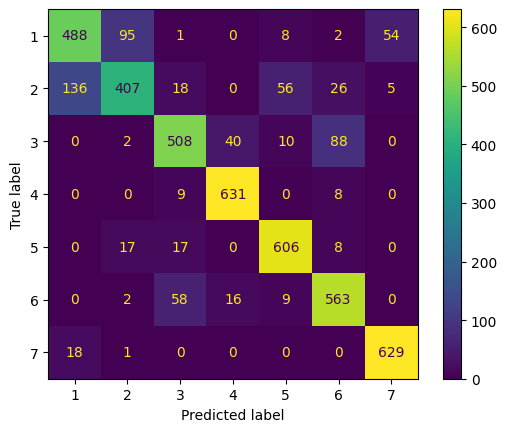

In [41]:
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score, ConfusionMatrixDisplay

y_pred = rfc.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test)
plt.show()

#### Step 32: Save Trained Model
Save the trained Random Forest model to disk using joblib for future use.

In [ ]:
import joblib

joblib.dump(rfc, 'random_forest_model.pkl')

['random_forest_model.joblib']